<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/python_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%98%EB%A6%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [165]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv')

* Familysize 변수를 train, test 데이터셋에 만들고 Sibsp + Parch + 1(나 자신)의 값을 넣어라.
* Fare 변수의 결측값을 Fare의 평균값으로 대체하고 전체 Fare변수에 log를 취해라

In [166]:
df_train['Familysize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['Familysize'] = df_test['SibSp'] + df_test['Parch'] +1

df_train.loc[df_train.Fare.isnull(),'Fare'] = df_train['Fare'].mean()
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)


* inital을 name으로부터 Miss,Mrr,Mrs를 추출해 보아라

In [167]:
print(df_train['Name'].isnull().value_counts(),\
      '\n', np.shape(df_train['Name'])[0]) # 결측없음

False    891
Name: Name, dtype: int64 
 891


In [168]:
df_train['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')

In [169]:
df_train['Initial'].head()

# Braund, Mr. Owen Harris

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [170]:
# inital에 결측이 있는지 확인
check_null1 = df_train.loc[df_train.Name.isnull() == True].value_counts().count()
check_null2 = df_test.loc[df_test.Name.isnull() == True].value_counts().count()
print(check_null1,check_null2)

# 영어가 최소 하나이상오며(+), 점(.)앞의 까지의 값을 가져온다.
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

0 0


* crosstab을 이용하여 inital에 따른 성별을 교차표로 표현해라
  * 교차표로 표현시 전치하여라

In [171]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient('summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [172]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* replace메서드를 이용해 Initail값의 특정 데이터 값을 치환해라
  * 기존 : ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
  * 바꾼 후 : ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [173]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major',\
                            'Lady','Countess','Jonkheer','Col',\
                            'Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr',\
                            'Mrs','Mrs','Other','Other','Other',
                            'Mr','Mr','Mr', 'Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major',\
                            'Lady','Countess','Jonkheer','Col',\
                            'Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr',\
                            'Mrs','Mrs','Other','Other','Other',
                            'Mr','Mr','Mr', 'Mr'],inplace=True)

* Initial 그룹별 평균값을 구하고 이를 plt을 이용하여 Survived =1에 대한 바 그래프를 그려라

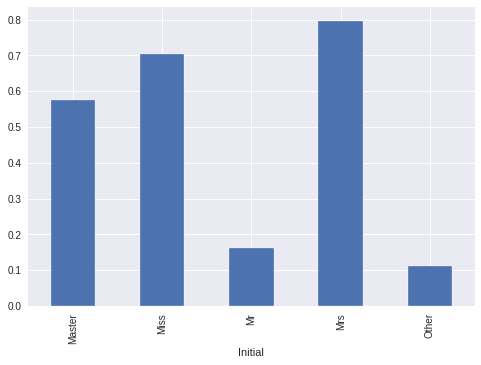

In [174]:
# groupby로 지정 변수에 대해 정렬한 후 . 뒤의 mean()이나 sum()으로
# 집계를 낸다. 이때 집계를 냈을 때 기준이 되는 변수를 지정할 수 있다.
plt.style.use('seaborn')
df_train.groupby('Initial')['Survived'].mean().plot.bar()

* 각 initial의 Age 평균값을 이용해 Null value를 채워라 

In [175]:
first_name = ['Mr','Mrs','Master','Miss','Other']

0

In [181]:
## null대체전 null샘플 확인 ##
df_train.loc[(df_train.Initial=='Mr')& (df_train.Age.isnull())]
# passengerId = 879
df_train.loc[(df_train.Initial=='Miss')& (df_train.Age.isnull())]
# passengerId = 29


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Initial


In [178]:
for i in first_name :
  df_train.loc[(df_train.Initial==i)& (df_train.Age.isnull()), 'Age'] = \
  round(df_train.groupby('Initial')['Age'].mean()[i])